In [1]:
# # Exploring the Bias-Variance Tradeoff 
 
import pandas as pd 
import numpy as np 
import seaborn as sns 
%matplotlib inline 

In [2]:
# ## Brain and body weight 
 
''' 
This is a [dataset]) of the average  
weight of the body and the brain for  
62 mammal species. Let's read it into pandas and  
take a quick look: 
''' 
 
df = pd.read_table('x01.txt', sep='\s+', skiprows=33, names=['id','brain','body'], index_col='id') 
df.head() 


,brain,body
id,,
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5


In [3]:
# We're going to focus on a smaller subset in which the body weight is less than 200: 
df = df[df.body < 200] 
df.shape 
(51, 2)

(51, 2)

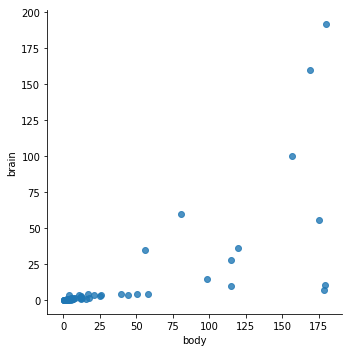

In [20]:
# Let's create a scatterplot 

sns.lmplot(x='body', y='brain', data=df, ci=None, fit_reg=False) 



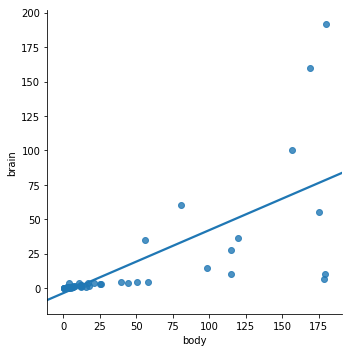

In [22]:
sns.lmplot(x='body', y='brain', data=df, ci=None) 

In [23]:
# set a random seed for reproducibility 
np.random.seed(12345) 
 
 
# randomly assign every row to either sample 1 or sample 2 
df['sample'] = np.random.randint(1, 3, len(df)) 
df.head() 

,brain,body,sample
id,,,
1,3.385,44.5,1
2,0.480,15.5,2
3,1.350,8.1,2
5,36.330,119.5,2
6,27.660,115.0,1


In [24]:
# Compare the two samples, they are fairly different! 
df.groupby('sample')[['brain', 'body']].mean() 

,brain,body
sample,,
1,18.113778,52.068889
2,13.323364,34.669091


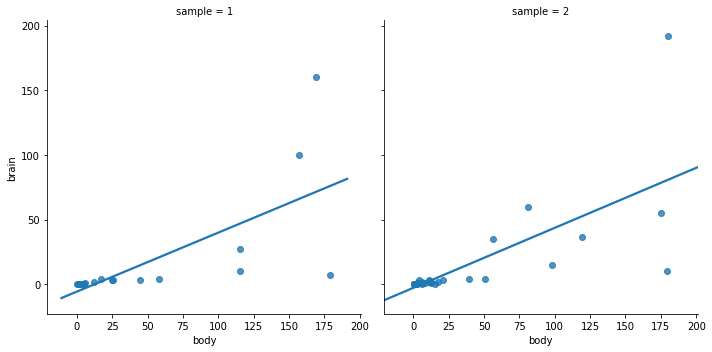

In [25]:
# col='sample' subsets the data by sample and creates two  
# separate plots 
sns.lmplot(x='body', y='brain', data=df, ci=None, col='sample') 


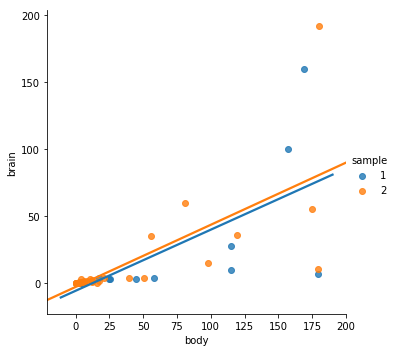

In [26]:
# hue='sample' subsets the data by sample and creates a  
# single plot 
sns.lmplot(x='body', y='brain', data=df, ci=None, hue='sample') 


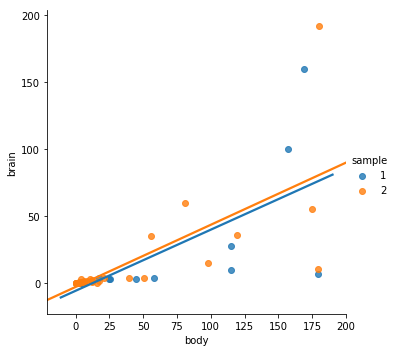

In [27]:
# hue='sample' subsets the data by sample and creates a  
# single plot 
sns.lmplot(x='body', y='brain', data=df, ci=None, hue='sample') 


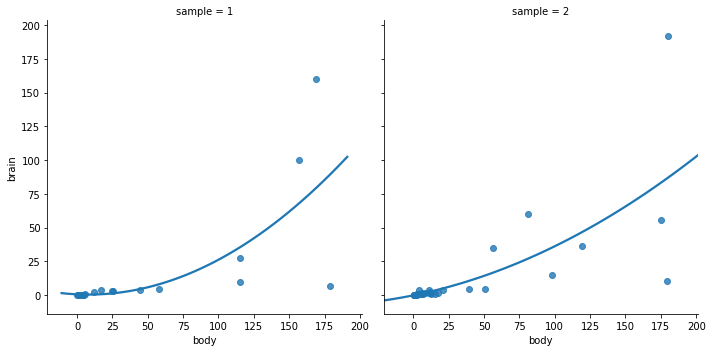

In [28]:
# Let's try a second order polynomial instead: 
sns.lmplot(x='body', y='brain', data=df, ci=None, col='sample', order=2) 


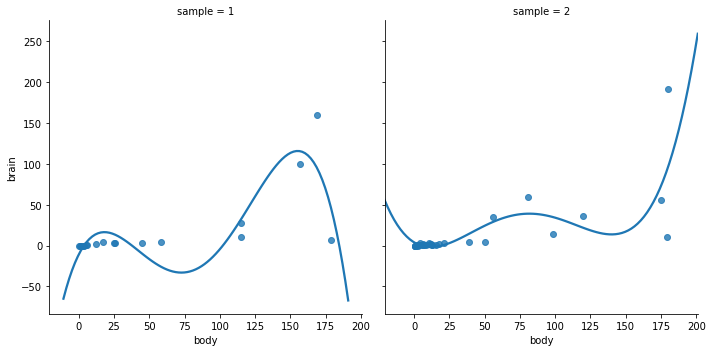

In [29]:
# What would a low bias, high variance model look like? Let's try polynomial regression, with an fourth order polynomial: 
sns.lmplot(x='body', y='brain', data=df, ci=None,  col='sample', order=4) 


In [36]:
from sklearn.neighbors import KNeighborsClassifier 
# read in the iris data 
from sklearn.datasets import load_iris 
iris = load_iris() 
X, y = iris.data, iris.target 

In [37]:
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X, y) 
knn.score(X, y) 
1.0 

1.0

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


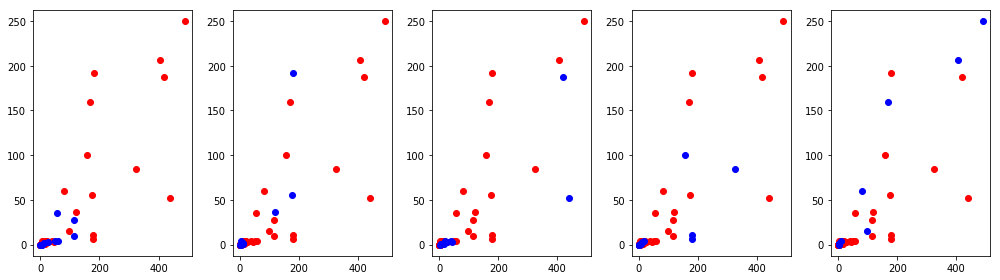

In [38]:

import matplotlib.pyplot as plt 
from sklearn.cross_validation import KFold 
 
df = pd.read_table('x01.txt', sep='\s+', skiprows=33, names=['id','brain','body']) 
df = df[df.brain < 300][df.body < 500] 
# limit points for visibility 
 
nfolds = 5 
fig, axes = plt.subplots(1, nfolds, figsize=(14,4)) 
for i, fold in enumerate(KFold(len(df), n_folds=nfolds,  
                               shuffle=True)): 
    training, validation = fold 
    x, y = df.iloc[training]['body'], df.iloc[training]['brain'] 
    axes[i].plot(x, y, 'ro') 
    x, y = df.iloc[validation]['body'], df.iloc[validation]['brain'] 
    axes[i].plot(x, y, 'bo') 
    plt.tight_layout() 
 


In [42]:
from sklearn.neighbors import KNeighborsClassifier 
# read in the iris data 
from sklearn.datasets import load_iris 
iris = load_iris() 
X, y = iris.data, iris.target 

knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X, y) 
knn.score(X, y) 

# Using a training set and test set is so important 
# Just as important is cross validation. Remember cross validation  
# is using several different train test splits and   
# averaging your results! 
 
## CROSS-VALIDATION 
 
# check CV score for K=1 
from sklearn.cross_validation import cross_val_score, train_test_split 
tree = KNeighborsClassifier(n_neighbors=1) 
scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy') 
scores.mean() 


0.96

In [43]:
# check CV score for K=5 
knn = KNeighborsClassifier(n_neighbors=5) 
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy') 
scores 
np.mean(scores) 

0.9733333333333334

In [44]:
# search for an optimal value of K 
k_range = range(1, 30, 2) # [1, 3, 5, 7, ..., 27, 29] 
errors = [] 
for k in k_range: 
        knn = KNeighborsClassifier(n_neighbors=k) 
           # instantiate a KNN with k neighbors 
        scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy') 
         # get our five accuracy scores 
        accuracy = np.mean(scores) 
           # average them together 
        error = 1 - accuracy 
           # get our error, which is 1 minus the accuracy 
        errors.append(error) 
           # keep track of a list of errors

Text(0,0.5,'Error')

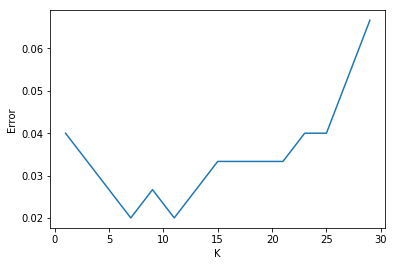

In [45]:
# plot the K values (x-axis) versus the 5-fold CV score (y-axis) 
plt.figure() 
plt.plot(k_range, errors) 
plt.xlabel('K') 
plt.ylabel('Error') 

In [47]:
from sklearn.grid_search import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
# import our grid search module 
 
knn = KNeighborsClassifier(n_jobs=-1) 
# instantiate a blank slate KNN, no neighbors 

k_range = list(range(1, 31, 2))
print(k_range)

#k_range = range(1, 30) 
param_grid = dict(n_neighbors=k_range) 
# param_grid = {"n_ neighbors": [1, 3, 5, ...]} 
print(param_grid)

grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy') 
 
     
grid.fit(X, y) 

 


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

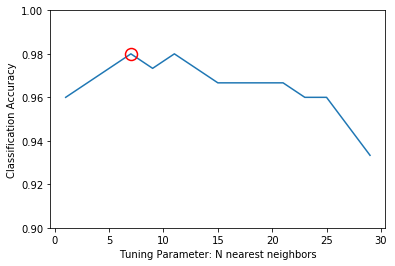

In [49]:
# check the results of the grid search 
grid.grid_scores_ 
grid_mean_scores = [result[1] for result in grid.grid_scores_] 
# this is a list of the average accuracies for each parameter  
# combination 
plt.figure() 
plt.ylim([0.9, 1]) 
plt.xlabel('Tuning Parameter: N nearest neighbors') 
plt.ylabel('Classification Accuracy') 
plt.plot(k_range, grid_mean_scores) 
plt.plot(grid.best_params_['n_neighbors'], grid.best_score_, 'ro', markersize=12, markeredgewidth=1.5, 
         markerfacecolor='None', markeredgecolor='r') 
 

In [50]:
grid.best_params_ 
# {'n_neighbors': 7} 
 
grid.best_score_ 
# 0.9799999999 
 
grid.best_estimator_
# actually returns the unfit model with the best parameters
# KNeighborsClassifier(algorithm='auto', leaf_size=30,metric=('minkowski', metric_params= None, n_jobs=1, n_neighbors=7, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
           weights='uniform')

Text(0,0.5,'RMSE')

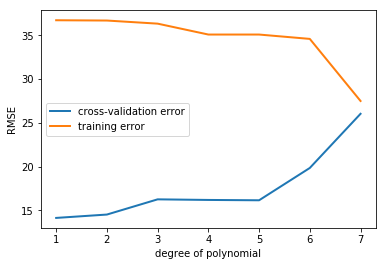

In [52]:
# This function uses a numpy polynomial fit function to 
# calculate the RMSE of given X and y 
def rmse(x, y, coefs): 
    yfit = np.polyval(coefs, x) 
    rmse = np.sqrt(np.mean((y - yfit) ** 2)) 
    return rmse 
 
xtrain, xtest, ytrain, ytest = train_test_split(df['body'], df['brain']) 
 
train_err = [] 
validation_err = [] 
degrees = range(1, 8) 
 
for i, d in enumerate(degrees): 
    p = np.polyfit(xtrain, ytrain, d) 
  # built in numpy polynomial fit function 
 
    train_err.append(rmse(xtrain, ytrain, p)) 
    validation_err.append(rmse(xtest, ytest, p)) 
 
 
fig, ax = plt.subplots() 
# begin to make our graph 
 
ax.plot(degrees, validation_err, lw=2, label = 'cross-validation error') 
ax.plot(degrees, train_err, lw=2, label = 'training error') 
# Our two curves, one for training error, the other for cross validation 
 
ax.legend(loc=0) 
ax.set_xlabel('degree of polynomial') 
ax.set_ylabel('RMSE') 


In [53]:
# ENSEMBLING 
 
import numpy as np 
 
# set a seed for reproducibility 
np.random.seed(12345) 
 
# generate 1000 random numbers (between 0 and 1) for each model, representing 1000 observations 
mod1 = np.random.rand(2000) 
mod2 = np.random.rand(2000) 
mod3 = np.random.rand(2000) 
mod4 = np.random.rand(2000) 
mod5 = np.random.rand(2000) 


In [54]:
# each model independently predicts 1 (the "correct response") if random number was at least 0.4 
preds1 = np.where(mod1 > 0.4, 1, 0) 
preds2 = np.where(mod2 > 0.4, 1, 0) 
preds3 = np.where(mod3 > 0.4, 1, 0) 
preds4 = np.where(mod4 > 0.4, 1, 0) 
preds5 = np.where(mod5 > 0.4, 1, 0) 
 
print(preds1.mean()) 
0.596
print (preds2.mean()) 
0.6065
print (preds3.mean()) 
0.591
print (preds4.mean()) 
0.5965
print( preds5.mean()) 
0.611
 
# Each model has an "accuracy of around 60% on its own 


0.596
0.6065
0.591
0.5965
0.611


0.685

In [58]:
# average the predictions and then round to 0 or 1 
ensemble_preds = np.round((preds1 + preds2 + preds3 + preds4 + preds5)/5.0).astype(int) 
ensemble_preds.mean() 
 
 

0.674

In [59]:
# set a seed for reproducibility 
np.random.seed(1) 
 
# create an array of 1 through 20 
nums = np.arange(1, 21) 
print(nums) 

 
# sample that array 20 times with replacement 
np.random.choice(a=nums, size=20, replace=True) 

# This is our bootstrapped sample notice it has repeat variables! 


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


array([ 6, 12, 13,  9, 10, 12,  6, 16,  1, 17,  2, 13,  8, 14,  7, 19,  6,
       19, 12, 11])

In [60]:
# read in the data 
url = 'hitters.csv' 
 
hitters = pd.read_csv(url) 
 
# remove rows with missing values 
hitters.dropna(inplace=True) 
 
# encode categorical variables as integers 
hitters['League'] = pd.factorize(hitters.League)[0] 
hitters['Division'] = pd.factorize(hitters.Division)[0] 
hitters['NewLeague'] = pd.factorize(hitters.NewLeague)[0] 
 
# define features: exclude career statistics (which start with "C") and the response (Salary) 
feature_cols = [h for h in hitters.columns if h[0] != 'C' and h != 'Salary'] 
 
 
 
# define X and y 
X = hitters[feature_cols] 
y = hitters.Salary 


C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in v

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in v

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in v

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in v

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in v

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in v

Text(0,0.5,'RMSE (lower is better)')

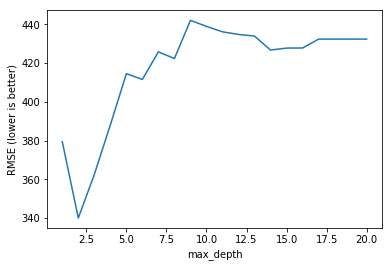

In [53]:
from sklearn.tree import DecisionTreeRegressor 
 
# list of values to try for max_depth 
max_depth_range = range(1, 21) 
 
# list to store the average RMSE for each value of max_depth 
RMSE_scores = [] 
 
# use 10-fold cross-validation with each value of max_depth 
from sklearn.cross_validation import cross_val_score 
for depth in max_depth_range: 
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1) 
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error') 
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores))) 
 
# plot max_depth (x-axis) versus RMSE (y-axis) 
plt.plot(max_depth_range, RMSE_scores) 
plt.xlabel('max_depth') 
plt.ylabel('RMSE (lower is better)') 
 


C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in v

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in v

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in v

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in v

Text(0,0.5,'RMSE (lower is better)')

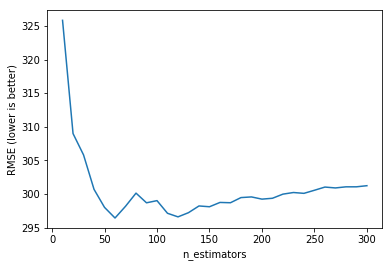

In [54]:
from sklearn.ensemble import RandomForestRegressor 
 
 
# list of values to try for n_estimators 
estimator_range = range(10, 310, 10) 
 
# list to store the average RMSE for each value of n_estimators 
RMSE_scores = [] 
 
# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!) 
for estimator in estimator_range: 
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1) 
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='mean_squared_error') 
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores))) 
     
     
# plot n_estimators (x-axis) versus RMSE (y-axis) 
plt.plot(estimator_range, RMSE_scores) 
plt.xlabel('n_estimators') 
plt.ylabel('RMSE (lower is better)') 
 


In [61]:
from sklearn.cross_validation import cross_val_score 
from sklearn import datasets 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier 
%matplotlib inline 
 
digits = datasets.load_digits() 
X, y = digits.data, digits.target 
 
# 64 pixels per image 
X[0].shape 
 
# Try Random Forest 
rfclf = RandomForestClassifier(n_estimators=100, random_state=1) 
cross_val_score(rfclf, X, y, cv=5, scoring='accuracy').mean() 


C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9382782563111268

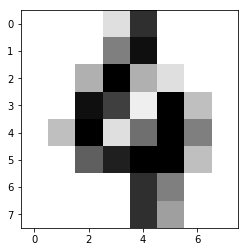

In [62]:
from sklearn.cross_validation import cross_val_score 
from sklearn import datasets 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier 
%matplotlib inline 
 
digits = datasets.load_digits() 
 
plt.imshow(digits.images[100], cmap=plt.cm.gray_r, interpolation='nearest') 
# a 4 digit 


In [63]:
X, y = digits.data, digits.target 
 
# 64 pixels per image 
X[0].shape 
 
# Try Random Forest 
rfclf = RandomForestClassifier(n_estimators=100, random_state=1) 
cross_val_score(rfclf, X, y, cv=5, scoring='accuracy').mean() 

0.9382782563111268

In [ ]:
from pybrain.datasets            import ClassificationDataSet 
from pybrain.utilities           import percentError 
from pybrain.tools.shortcuts     import buildNetwork 
from pybrain.supervised.trainers import BackpropTrainer 
from pybrain.structure.modules   import SoftmaxLayer 
from numpy import ravel 
 
# pybrain has its own data sample class that we must add 
# our training and test set to 
ds = ClassificationDataSet(64, 1 , nb_classes=10) 
for k in xrange(len(X)):  
    ds.addSample(ravel(X[k]),y[k]) 
     
# their equivalent of train test split 
test_data, training_data = ds.splitWithProportion( 0.25 ) 
 
 
# pybrain's version of dummy variables 
 
test_data._convertToOneOfMany( ) 
training_data._convertToOneOfMany( ) 
 
 
print( test_data.indim) # number of pixels going in 
# 64 
print( test_data.outdim) # number of possible options (10 digits) 
# 10 
 
 
 
# instantiate the model with 64 hidden layers (standard params) 
fnn = buildNetwork( training_data.indim, 64, training_data.outdim, outclass=SoftmaxLayer ) 
trainer = BackpropTrainer( fnn, dataset=training_data, momentum=0.1, learningrate=0.01 , verbose=True, weightdecay=0.01)  
 
# change the number of epochs to try to get better results! 
trainer.trainEpochs (10) # 10 batches 
print ('Percent Error on Test dataset: ' ,  percentError( trainer.testOnClassData ( dataset=test_data ) , test_data['class'] ) )

In [ ]:
Percent Error on Test dataset: 4.67706013363 
accuracy = 1 - .0467706013363 


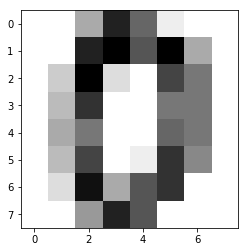

In [67]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest') 
 
 
 


In [ ]:
fnn.activate(X[0]) 
array([ 0.92183643,  0.00126609,  0.00303146,  0.00387049,  0.01067609, 
        0.00718017,  0.00825521,  0.00917995,  0.00696929,  0.02773482])

In [ ]:
# Do it again and see the difference in error 
fnn = buildNetwork( training_data.indim, 64, training_data.outdim, outclass=SoftmaxLayer ) 
trainer = BackpropTrainer( fnn, dataset=training_data, momentum=0.1, learningrate=0.01 , verbose=True, weightdecay=0.01)  
 
# change the number of eopchs to try to get better results! 
trainer.trainEpochs (10) 
print('Percent Error on Test dataset: ' , percentError( trainer.testOnClassData ( dataset=test_data ) , test_data['class'] )) 
 
accuracy = 1 - .0645879732739 
accuracy 
0.93541 